In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.Geography.nunique()

3

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df.Gender = le.fit_transform(df.Gender)

In [9]:
dummies = pd.get_dummies(df['Geography'])
df = pd.concat([df,dummies],axis=1)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [10]:
df.CustomerId.nunique()

10000

In [11]:
df1 = df.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1)
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [13]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

df1[cols_to_scale] = sc.fit_transform(df1[cols_to_scale])

In [14]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [15]:
X = df1.drop(['Exited'],axis=1)
y = df1.Exited

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
from tensorflow import keras
import tensorflow as tf

In [18]:
len(X_train.columns)

12

In [19]:
model = keras.Sequential([
    keras.layers.Dense(36, input_shape=(12,), activation = 'relu'),
    keras.layers.Dense(24, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [20]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.4787 - accuracy: 0.7977
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4421 - accuracy: 0.8106
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.8209
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3903 - accuracy: 0.8324
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3723 - accuracy: 0.8459
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3621 - accuracy: 0.8501
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3575 - accuracy: 0.8520
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.8520
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3530 - accuracy: 0.8526
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3505 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.8714
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3115 - accuracy: 0.8681
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3085 - accuracy: 0.8715
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3106 - accuracy: 0.8689
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3106 - accuracy: 0.8714
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3094 - accuracy: 0.8727
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.8717
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3071 - accuracy: 0.8730
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3087 - accuracy: 0.8705
Epoch 90/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3067 - accuracy: 

In [22]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8595


[0.36281198263168335, 0.859499990940094]

In [23]:
y_pred = model.predict(X_test)
y_pred[:10]

array([[0.24813011],
       [0.00546446],
       [0.01142681],
       [0.19097999],
       [0.13833776],
       [0.02090046],
       [0.09932035],
       [0.0031608 ],
       [0.23975134],
       [0.34552824]], dtype=float32)

In [24]:
y_test[:10]

8178    0
1548    0
5714    0
7411    0
8635    1
8592    0
639     0
9668    0
318     0
7080    1
Name: Exited, dtype: int64

In [25]:
y_predicted = []

for i in y_pred:
    if i>=0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [26]:
y_predicted[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [27]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1583
           1       0.77      0.47      0.58       417

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(69.0, 0.5, 'Truth')

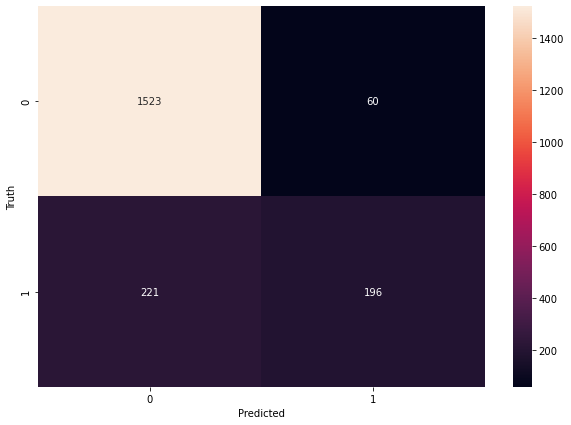

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')